# Data Visualization with Python Studio

At this point, you should already have connected with the rest of your group to divide up who is going to do what. Use this notebook to create your visualizations.

Below we set up the dataframe with the Goodreads dataset for you. If you run this cell, you may get an error that some lines were skipped. Do not worry about that! For this studio, we want to focus on creating an effective

In [13]:
# Here is the setup of the dataframe. Feel free to use .info() or .head() to get a better understanding of what is inside the dataframe!

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style

df = pd.read_csv("books.csv", error_bad_lines=False)

years = []

for y in df['publication_date']:
    date = y.split("/")
    years.append(date[2])

df["year"] = years
df.head()

C:\Users\priya\AppData\Local\Temp\ipykernel_35432\1280131512.py:9: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv("books.csv", error_bad_lines=False)


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,year
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,9.780000e+12,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,2006
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,439358078,9.780000e+12,eng,870,2153167,29221,9/1/2004,Scholastic Inc.,2004
2,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9.780000e+12,eng,352,6333,244,11/1/2003,Scholastic,2003
3,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9.780000e+12,eng,435,2339585,36325,5/1/2004,Scholastic Inc.,2004
4,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,439682584,9.780000e+12,eng,2690,41428,164,9/13/2004,Scholastic,2004


With your dataframe set up, time to start creating visualizations!

In [16]:
df.describe()

,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count
count,11122.000000,11122.000000,1.112200e+04,11122.000000,1.112200e+04,11122.000000
mean,21308.679284,3.934073,9.759168e+12,336.378259,1.794446e+04,542.096655
std,13093.301623,0.350501,4.429643e+11,241.146283,1.125041e+05,2576.730342
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000
25%,10273.750000,3.770000,9.780000e+12,192.000000,1.040000e+02,9.000000
50%,20275.500000,3.960000,9.780000e+12,299.000000,7.455000e+02,47.000000
75%,32103.750000,4.140000,9.780000e+12,416.000000,5.002750e+03,238.000000
max,45641.000000,5.000000,9.790000e+12,6576.000000,4.597666e+06,94265.000000


Text(0, 0.5, 'Number of Books')

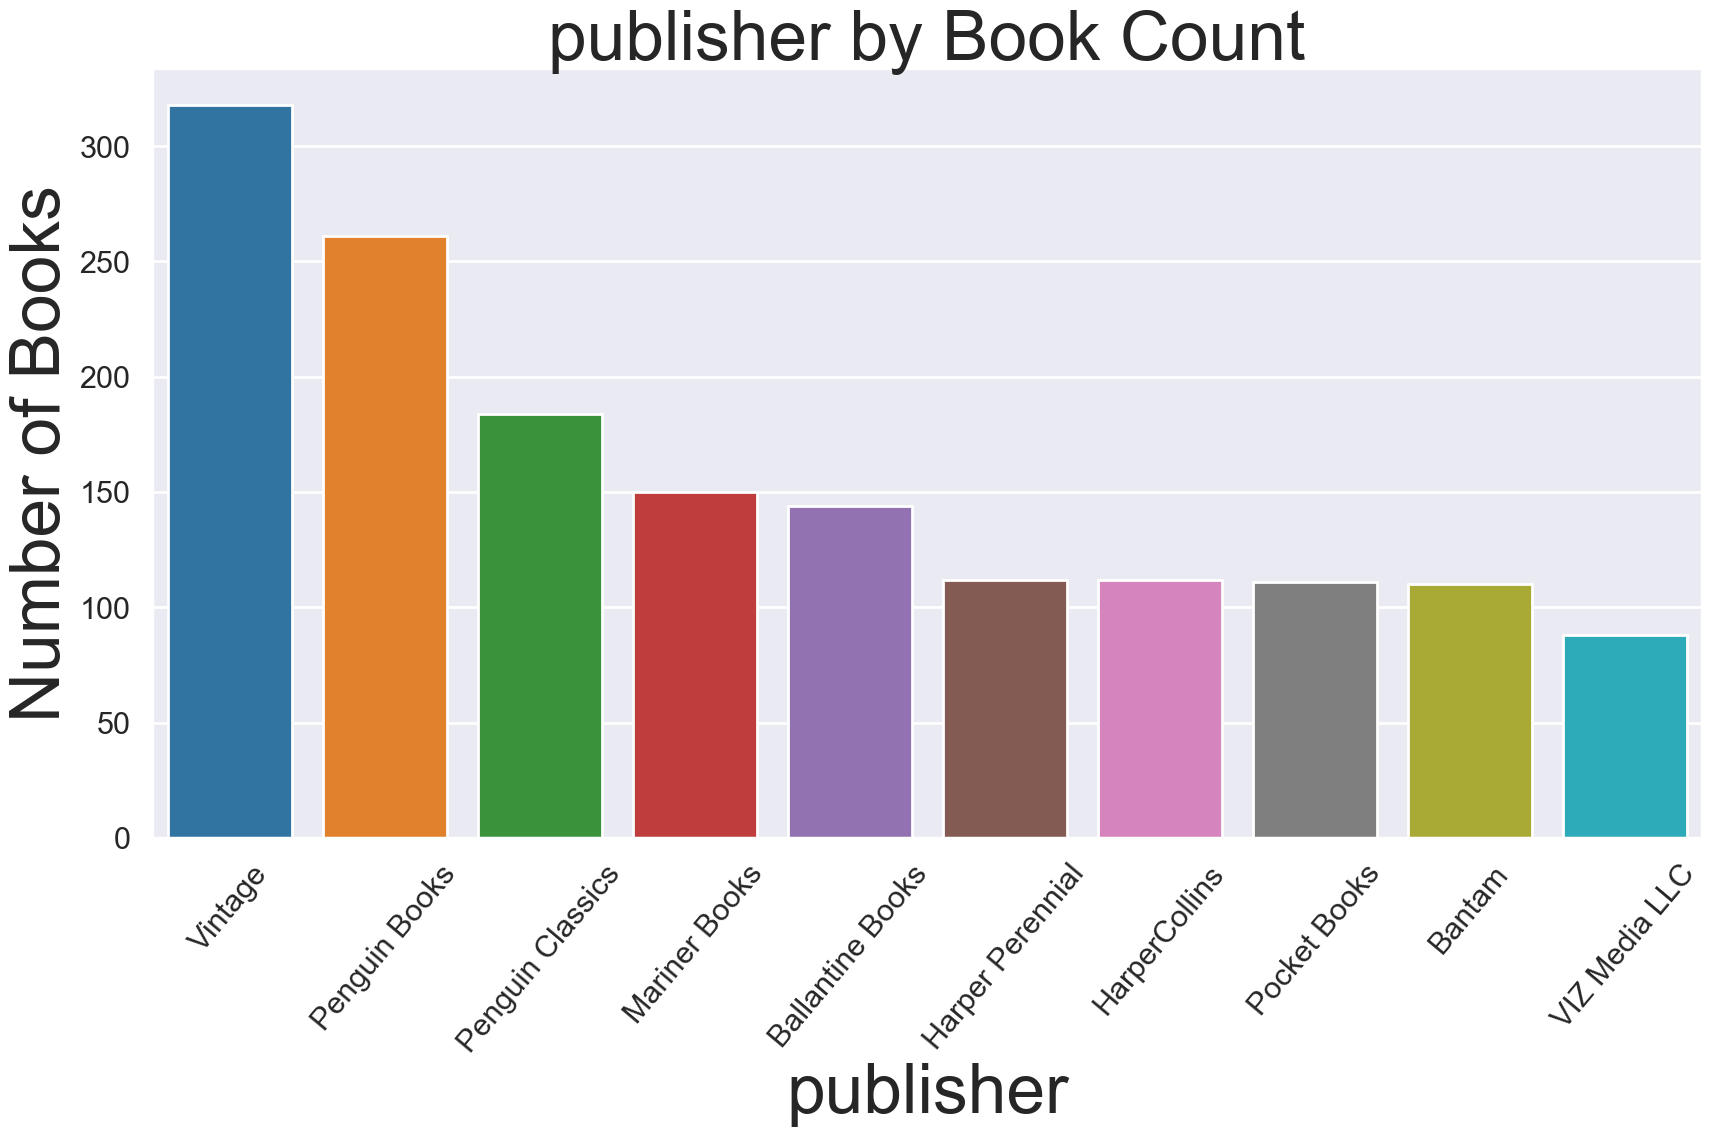

In [15]:
# Use your Python skills to create a visualization here.
df['publisher'].value_counts().head(10)

sb.set_context("poster")
most_books = df.groupby('publisher')['title'].count().reset_index().sort_values('title', ascending=False).head(10).set_index('publisher', )
plt.figure(figsize=(20,10))
ax = sb.barplot(x = most_books.index, y = most_books['title'], palette='tab10', orient = 'v')
ax.tick_params(axis='x', rotation=50)
ax.set_title("publisher by Book Count", size = 50)
ax.set_xlabel("publisher", size = 50)
ax.set_ylabel('Number of Books', size = 50)


In [17]:
# Use your Python skills to create a visualization here.
df_pub = df.loc[df['publication_date'] >= '01/01/1990']
df_pub['publication_year'] = pd.DatetimeIndex(df_pub['publication_date']).year
df_pub.shape

(11122, 14)

In [18]:
df_pub_temp = df_pub.groupby(['publication_year'])['bookID'].count().reset_index()
df_pub_temp

df_pub_temp.describe()

,publication_year,bookID
count,87.000000,87.000000
mean,1974.379310,127.839080
std,29.700928,294.505098
min,1900.000000,1.000000
25%,1955.500000,3.000000
50%,1977.000000,12.000000
75%,1998.500000,72.500000
max,2020.000000,1700.000000


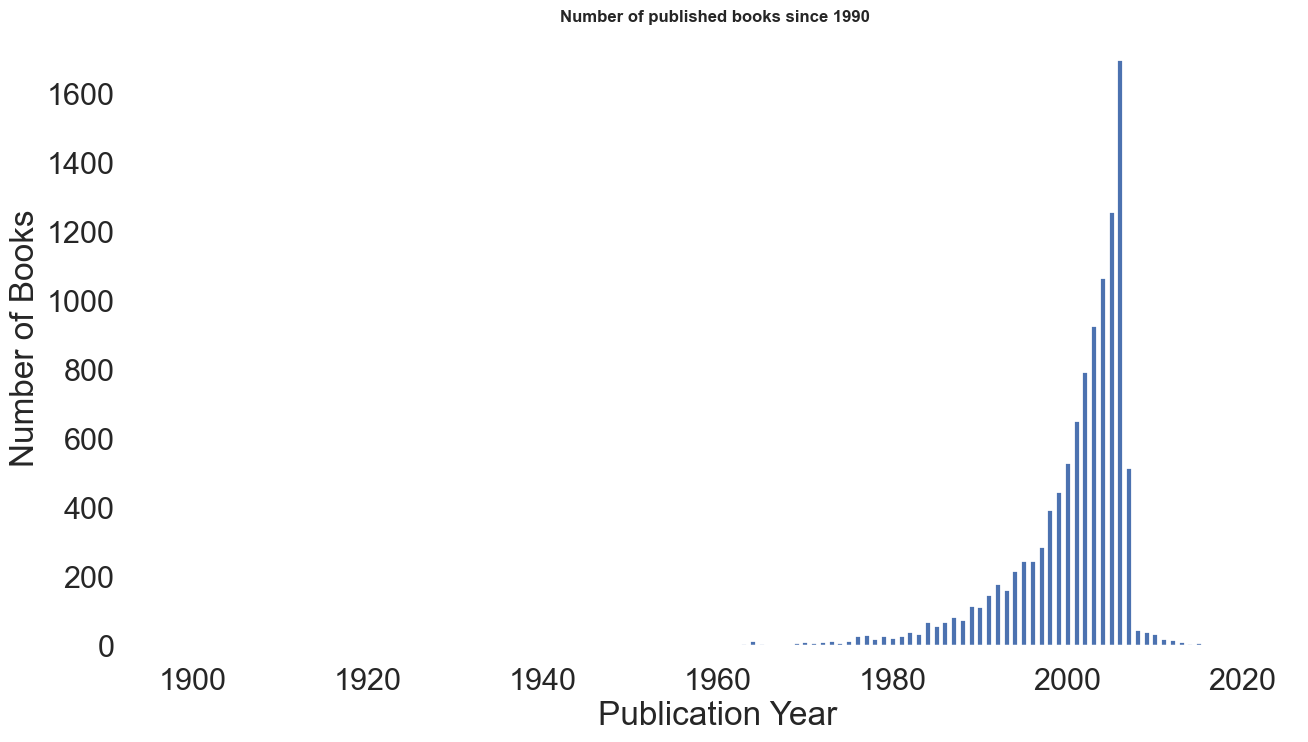

<Figure size 500x300 with 0 Axes>

In [19]:
fig_pub, ax_pub = plt.subplots()
fig_pub = plt.figure(figsize = (5,3))
ax_pub.set_title('Number of published books since 1990 ', fontsize = 12, weight = 'bold')
ax_pub.set_xlabel('Publication Year')
ax_pub.set_ylabel('Number of Books')
ax_pub.grid(False)
ax_pub.set_facecolor("white")
ax_pub.bar(df_pub_temp['publication_year'],df_pub_temp['bookID'])
plt.show()